#### Anurag Chilukuri
#### Akshata Mohan
#### Matt Staton
#### Valerie Roth
#### Daniel Lindquist
#### Daan Alexander

In [93]:
from pandas import Series, DataFrame
import pandas as pd
import nltk
from nltk import word_tokenize
from collections import defaultdict
from collections import Counter
import operator
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from scipy.sparse import hstack
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [94]:
import networkx as nx

In [95]:
senti_scores_df = pd.read_csv("Assignment 3 Sentiment Scores.csv")

#### Question 1 

In [96]:
graph = nx.DiGraph()

#senti_scores_df = senti_scores_df.fillna(0)

for a,b in senti_scores_df.iteritems():
    graph.add_node(a)

names = list(senti_scores_df.columns)

pairs_df = pd.DataFrame(index=np.array(range(len(senti_scores_df))))

node_1 = []
node_2 = []

##### Here in this snippet we are creating the data frame that contains the sentiment scores pairwise. 

In [97]:
for i in range(len(names)):
    for j in range(i+1,len(names)):
        pairs_df[str(names[i]) + '-' + str(names[j])] = np.array(senti_scores_df[[i]]) - np.array(senti_scores_df[[j]])
        node_1.append(names[i])
        node_2.append(names[j])

In [98]:
pairs_df

,ES-LS,ES-RX,ES-A8,ES-A6,ES-3series,ES-5series,ES-7series,ES-XJ,ES-Sclass,LS-RX,...,3series-5series,3series-7series,3series-XJ,3series-Sclass,5series-7series,5series-XJ,5series-Sclass,7series-XJ,7series-Sclass,XJ-Sclass
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,-4.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-1.0,2.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


##### in this code snippet we are creating the tuple of positive sentiment and negative sentiment for each pair. 

In [99]:
def senti_diff(s):
    mask = s > 0 
    es_ls = s
    pos = es_ls[mask]
    if len(pos)!= 0:
        sum_pos = sum(pos)/len(pos)
    else:
        sum_pos=0
    mask1 = s < 0 
    neg = es_ls[mask1]
    if len(neg)!= 0:
        sum_neg = sum(neg)/len(neg)
    else:
        sum_neg = 0
    return (sum_pos, sum_neg)

senti_diff = pairs_df.apply(senti_diff)


In [100]:
senti_diff

ES-LS                        (1.16666666667, -2.0)
ES-RX                        (1.66666666667, -2.0)
ES-A8                                  (3.4, -3.0)
ES-A6                        (6.0, -1.66666666667)
ES-3series                            (3.25, -6.0)
ES-5series                             (4.0, -5.0)
ES-7series                             (3.6, -2.8)
ES-XJ                                  (1.0, -1.0)
ES-Sclass          (3.28571428571, -2.61538461538)
LS-RX                        (3.4, -1.14285714286)
LS-A8              (2.85714285714, -2.83783783784)
LS-A6              (3.33333333333, -1.28571428571)
LS-3series                             (2.8, -4.0)
LS-5series                             (2.7, -3.1)
LS-7series                  (2.64285714286, -2.75)
LS-XJ                       (2.75, -2.88888888889)
LS-Sclass          (2.55405405405, -2.67741935484)
RX-A8                                  (2.2, -1.0)
RX-A6                           (3.66666666667, 0)
RX-3series                     

##### This code snippet is responsible for adding the directed edges from one node to the other - if the positive sentiment score for that pairwise edge is not zero, then add a directed edge from the first node to second. If the negative sentiment score for that pairwise edge is not zero, then add an edge from second node to the first

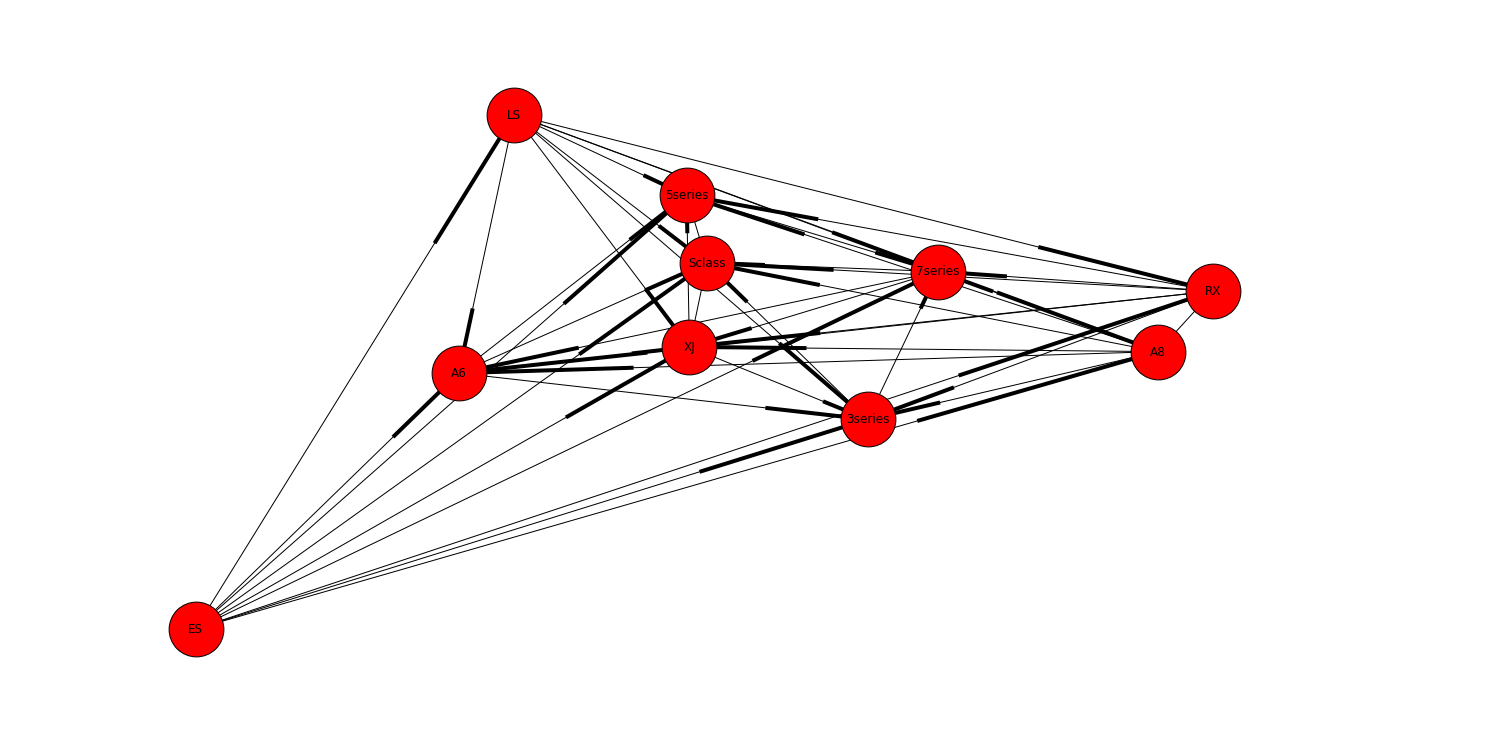

In [101]:
for a,b in senti_diff.iteritems():
    #getting node names
    y = a.split("-")
    if b[0] != 0:
        if (y[0],y[1]) not in graph.edges():
            graph.add_edges_from([(y[0],y[1])])
    elif b[1] != 0:
        if(y[1],y[0]) not in graph.edges():
            graph.add_edges_from([(y[1],y[0])])

plt.figure(figsize=(20,10))
pos=nx.spring_layout(graph)
node_labels = {node:node for node in graph.nodes()}
nx.draw(graph,pos,node_size=3000)
nx.draw_networkx_labels(graph, pos, labels=node_labels)
plt.show()

#### Question 2

##### unweighted graph 

In [102]:
pr = nx.pagerank(graph)

import operator

pr_sorted = sorted(pr.items(),key = operator.itemgetter(1), reverse = True)
pr_sorted_vals = []
for i in range(len(pr_sorted)):
    pr_sorted_vals.append(pr_sorted[i][1])
    
sales_dict = {'ES' : 135, 'LS' : 30, 'RX' : 120, 'A8':12, 'A6':20, '3series' : 220, '5series' : 60, '7series' :14,'Sclass': 25,'XJ':6.6} 
pr_sorted_vals

[0.24609979154702247,
 0.14931282825518433,
 0.11880282180666445,
 0.1101591674758378,
 0.1101591674758378,
 0.0979816208207822,
 0.04876808290642802,
 0.0434874510317422,
 0.03931068262238427,
 0.03591838605811659]

In [103]:
pr_sorted

[('Sclass', 0.24609979154702247),
 ('7series', 0.14931282825518433),
 ('XJ', 0.11880282180666445),
 ('3series', 0.1101591674758378),
 ('5series', 0.1101591674758378),
 ('A6', 0.0979816208207822),
 ('A8', 0.04876808290642802),
 ('RX', 0.0434874510317422),
 ('LS', 0.03931068262238427),
 ('ES', 0.03591838605811659)]

In [104]:
sales_val = [25,14,6.6,220,60,20,12,120,30,135]


print "Unweighted correlation coeff: ",numpy.corrcoef(sales_val,pr_sorted_vals)[0][1]

Unweighted correlation coeff:  -0.254625633266


##### weighted graph 

##### for this question, we will consider the sum of senti scores for each car model as the weight. 

In [105]:
def senti_diff_w(s):
    mask = s > 0 
    es_ls = s
    pos = es_ls[mask]
    if len(pos) != 0:
        sum_pos = sum(pos)/len(pos)
    else:
        sum_pos=0
    mask1 = s < 0 
    neg = es_ls[mask1]
    if len(neg)!= 0:
        sum_neg = sum(neg)/len(neg)
        sum_neg = abs(sum_neg)
    else:
        sum_neg = 0
    return (sum_pos,sum_neg)

senti_diff_w = pairs_df.apply(senti_diff_w)


senti_diff_w

ES-LS                        (1.16666666667, 2.0)
ES-RX                        (1.66666666667, 2.0)
ES-A8                                  (3.4, 3.0)
ES-A6                        (6.0, 1.66666666667)
ES-3series                            (3.25, 6.0)
ES-5series                             (4.0, 5.0)
ES-7series                             (3.6, 2.8)
ES-XJ                                  (1.0, 1.0)
ES-Sclass          (3.28571428571, 2.61538461538)
LS-RX                        (3.4, 1.14285714286)
LS-A8              (2.85714285714, 2.83783783784)
LS-A6              (3.33333333333, 1.28571428571)
LS-3series                             (2.8, 4.0)
LS-5series                             (2.7, 3.1)
LS-7series                  (2.64285714286, 2.75)
LS-XJ                       (2.75, 2.88888888889)
LS-Sclass          (2.55405405405, 2.67741935484)
RX-A8                                  (2.2, 1.0)
RX-A6                          (3.66666666667, 0)
RX-3series                             (4.0, 4.0)


##### the following code snippet creates a weighted edge from node 1 to node 2 and the weight is just the sum value of the absolute sentiment ( positive sentiment or negative sentiment )

In [106]:
w_graph = nx.DiGraph()
for a,b in senti_scores_df.iteritems():
    w_graph.add_node(a)

for a,b in senti_diff_w.iteritems():
    #getting node names
    y = a.split("-")
    if b[0] != 0:
        if (y[0],y[1]) not in w_graph.edges():
            w_graph.add_weighted_edges_from([(y[0],y[1],b[0])])
    elif b[1] != 0:
        if(y[1],y[0]) not in w_graph.edges():
            w_graph.add_weighted_edges_from([(y[1],y[0],abs(b[1]))])

pr_w = nx.pagerank(w_graph)

pr_w_sorted = sorted(pr_w.items(),key = operator.itemgetter(1), reverse = True)
pr_w_sorted

sales_dict = {'ES' : 135, 'LS' : 30, 'RX' : 120, 'A8':12, 'A6':20, '3series' : 220, '5series' : 60, '7series' :14,'Sclass': 25,'XJ':6.6} 



sales_val_w = [25,14,220,60,20,6.6,12,120,30,135]

pr_w_sorted_vals = []
for i in pr_w_sorted:
    pr_w_sorted_vals.append(i[1])

print "Weighted correlation coeff: ",numpy.corrcoef(sales_val_w,pr_w_sorted_vals)[0][1]

Weighted correlation coeff:  -0.1769988604


The negative correlation coefficient values between page rank metrics and sales shows us that there are some page rank scores that are more negatively correlated with the page ranks. For example, a lot of people might be interested to search for the costliest and trendy car ( Sclass, A8 ), but not many of them end up buying it. A few percentage of the population that search for it might be able to actually buy it. This could cause the correlation coefficient to go negative.

In [107]:
sales_dict = {'ES' : 135, 'LS' : 30, 'RX' : 120, 'A8':12, 'A6':20, '3series' : 220, '5series' : 60, '7series' :14,'Sclass': 25,'XJ':6.6} 

### Q3

In [108]:
Brands = ['es330','lexusls','rx','a8','a6','3series','5series','7series','xj','sclass']
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
df_edmund = pd.read_csv('C:\MSBA\Text Analytics\Assignment 3\Assignment 3 Edmunds Posts.csv') #Read the file
df_edmund_decoded = [x.decode('utf-8') for x in df_edmund['Posts']] #decode the file
df_edmund_decoded[:1]

[u'"As a Mercedes fan, I was sad, but I knew that those were not typical situations.."You\'re absolutely right. Take my previous \'01 SClass. This was pre-\'03 refresh, the very model that CR calls "the worst buy in the last decade". Well, the only problem I had was the usual COMAND failure that everyone experienced and one HID bulb. 41,000 miles of everyday driving and that was it. No ABC/Air-suspension failures, A/C problems, no electrical grimlins(much unlike my \'98 ls), noda..And to my \'05 S65 AMG. Two new rear tires was all the maintenance it required for 10,000 miles of onwership. Of course the usual oil/lube and other MB/AMG stuff, but nothing out of the scheduled maintenance. And the tires were due to my over-zealous driving habits.So many people jump the gun about MB\'s and Bimmers being hugely unreliable. Take for instance Porsche. 10 years ago, it was thought to be nothing more than a weekend toy because of what people assumed to be unreliable. Now it\'s the most reliable 

In [109]:
#Create tokens
df_tokenized = []
for i in range(len(df_edmund_decoded)):
    df_tokenized.append(tokenizer.tokenize(df_edmund_decoded[i]))
df_tokenized[:1]

[[u'As',
  u'a',
  u'Mercedes',
  u'fan',
  u'I',
  u'was',
  u'sad',
  u'but',
  u'I',
  u'knew',
  u'that',
  u'those',
  u'were',
  u'not',
  u'typical',
  u'situations',
  u'You',
  u're',
  u'absolutely',
  u'right',
  u'Take',
  u'my',
  u'previous',
  u'01',
  u'SClass',
  u'This',
  u'was',
  u'pre',
  u'03',
  u'refresh',
  u'the',
  u'very',
  u'model',
  u'that',
  u'CR',
  u'calls',
  u'the',
  u'worst',
  u'buy',
  u'in',
  u'the',
  u'last',
  u'decade',
  u'Well',
  u'the',
  u'only',
  u'problem',
  u'I',
  u'had',
  u'was',
  u'the',
  u'usual',
  u'COMAND',
  u'failure',
  u'that',
  u'everyone',
  u'experienced',
  u'and',
  u'one',
  u'HID',
  u'bulb',
  u'41',
  u'000',
  u'miles',
  u'of',
  u'everyday',
  u'driving',
  u'and',
  u'that',
  u'was',
  u'it',
  u'No',
  u'ABC',
  u'Air',
  u'suspension',
  u'failures',
  u'A',
  u'C',
  u'problems',
  u'no',
  u'electrical',
  u'grimlins',
  u'much',
  u'unlike',
  u'my',
  u'98',
  u'ls',
  u'noda',
  u'And',
  u't

In [110]:
#Converts words to lowercase
lemmatizer = WordNetLemmatizer()
df_edmund_lower = []
lower_word_list=[]
for listofwords in df_tokenized:
    for word in listofwords:
        lower_word_list.append(lemmatizer.lemmatize(word.lower()))
    df_edmund_lower.append(lower_word_list)
    lower_word_list = []
df_edmund_lower[:10]

[[u'a',
  u'a',
  u'mercedes',
  u'fan',
  u'i',
  u'wa',
  u'sad',
  u'but',
  u'i',
  u'knew',
  u'that',
  u'those',
  u'were',
  u'not',
  u'typical',
  u'situation',
  u'you',
  u're',
  u'absolutely',
  u'right',
  u'take',
  u'my',
  u'previous',
  u'01',
  u'sclass',
  u'this',
  u'wa',
  u'pre',
  u'03',
  u'refresh',
  u'the',
  u'very',
  u'model',
  u'that',
  u'cr',
  u'call',
  u'the',
  u'worst',
  u'buy',
  u'in',
  u'the',
  u'last',
  u'decade',
  u'well',
  u'the',
  u'only',
  u'problem',
  u'i',
  u'had',
  u'wa',
  u'the',
  u'usual',
  u'comand',
  u'failure',
  u'that',
  u'everyone',
  u'experienced',
  u'and',
  u'one',
  u'hid',
  u'bulb',
  u'41',
  u'000',
  u'mile',
  u'of',
  u'everyday',
  u'driving',
  u'and',
  u'that',
  u'wa',
  u'it',
  u'no',
  u'abc',
  u'air',
  u'suspension',
  u'failure',
  u'a',
  u'c',
  u'problem',
  u'no',
  u'electrical',
  u'grimlins',
  u'much',
  u'unlike',
  u'my',
  u'98',
  u'l',
  u'noda',
  u'and',
  u'to',
  u'my'

In [111]:
#Remove stopwords
df_edmund_filtered = []  
no_stop =[]
l = []
for listofwords in df_edmund_lower:
        listofwords = [word for word in listofwords if word not in stopwords.words('english')]
        df_edmund_filtered.append(listofwords)

In [112]:
#Create a cooccurence matrix - com which contains words within the words + words adjacent to it - +-1
import re
list_of_sentiments=[]
com_high = defaultdict(lambda : defaultdict(int))
for i in range(len(df_edmund_filtered)):
    for m in Brands:
        if m in df_edmund_filtered[i]:
            for j in range(max(0,df_edmund_filtered[i].index(m)-5),min(len(df_edmund_filtered[i]),df_edmund_filtered[i].index(m)+5)):
                w1, w2 = [m, df_edmund_filtered[i][j]] 
                com_high[w1][w2] += 1
    list_of_sentiments.append(com_high)
    com_high = defaultdict(lambda : defaultdict(int))

In [113]:
sentiment = sentiment = pd.read_csv('C:\MSBA\Text Analytics\Assignment 2\Sentiment.csv')
sentiment.columns=['words','score']

sentiment['words']=sentiment['words'].map(lambda x:tokenizer.tokenize(x)[0])

sentiment_dict = {}
for i in sentiment['words']:
    sentiment_dict[i]=sentiment[sentiment['words']==i]['score'].values[0]
    
for i in list_of_sentiments:
    for j,f in i.iteritems():
        for a,b in f.iteritems():
            if a in sentiment_dict.keys():
                f[a] = sentiment_dict[a]
            else:
                f[a] = 0
                
sum = 0
for i in list_of_sentiments:
    for j,f in i.iteritems():
        for a,b in f.iteritems():
            sum = sum + b
        i[j] = sum
        sum = 0

        

In [114]:
list_of_sentiments

[defaultdict(<function __main__.<lambda>>, {'a8': 3, 'sclass': 0}),
 defaultdict(<function __main__.<lambda>>, {}),
 defaultdict(<function __main__.<lambda>>,
             {'7series': 0, 'a8': 0, 'lexusls': 0, 'sclass': 0}),
 defaultdict(<function __main__.<lambda>>, {'rx': 2}),
 defaultdict(<function __main__.<lambda>>,
             {'3series': 0, '7series': 0, 'lexusls': 0, 'rx': 0, 'sclass': 0}),
 defaultdict(<function __main__.<lambda>>, {'es330': 0, 'sclass': 1}),
 defaultdict(<function __main__.<lambda>>,
             {'es330': -2, 'rx': 0, 'sclass': 0}),
 defaultdict(<function __main__.<lambda>>, {'a8': 0}),
 defaultdict(<function __main__.<lambda>>, {'a8': 0}),
 defaultdict(<function __main__.<lambda>>,
             {'7series': 2, 'lexusls': -2, 'sclass': 0}),
 defaultdict(<function __main__.<lambda>>, {'a8': 1, 'xj': 1}),
 defaultdict(<function __main__.<lambda>>,
             {'7series': 0, 'a8': 0, 'lexusls': 0}),
 defaultdict(<function __main__.<lambda>>,
             {'a6'

In [115]:
unsupervised_senti_scores = pd.DataFrame(list_of_sentiments)

In [116]:
unsupervised_senti_scores

,3series,5series,7series,a6,a8,es330,lexusls,rx,sclass,xj
0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
6,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,0.0,0.0,NaN
7,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2.0,NaN,NaN,NaN,-2.0,NaN,0.0,NaN


We repeat steps from Q1 and Q2 to calculate correlations

In [130]:
senti_scores_df = unsupervised_senti_scores

In [131]:
graph = nx.DiGraph()

#senti_scores_df = senti_scores_df.fillna(0)

for a,b in senti_scores_df.iteritems():
    graph.add_node(a)

names = list(senti_scores_df.columns)

pairs_df = pd.DataFrame(index=np.array(range(len(senti_scores_df))))

node_1 = []
node_2 = []

In [132]:
for i in range(len(names)):
    for j in range(i+1,len(names)):
        pairs_df[str(names[i]) + '-' + str(names[j])] = np.array(senti_scores_df[[i]]) - np.array(senti_scores_df[[j]])
        node_1.append(names[i])
        node_2.append(names[j])

In [138]:
pairs_df.columns

Index([u'3series-5series', u'3series-7series', u'3series-a6', u'3series-a8',
       u'3series-es330', u'3series-lexusls', u'3series-rx', u'3series-sclass',
       u'3series-xj', u'5series-7series', u'5series-a6', u'5series-a8',
       u'5series-es330', u'5series-lexusls', u'5series-rx', u'5series-sclass',
       u'5series-xj', u'7series-a6', u'7series-a8', u'7series-es330',
       u'7series-lexusls', u'7series-rx', u'7series-sclass', u'7series-xj',
       u'a6-a8', u'a6-es330', u'a6-lexusls', u'a6-rx', u'a6-sclass', u'a6-xj',
       u'a8-es330', u'a8-lexusls', u'a8-rx', u'a8-sclass', u'a8-xj',
       u'es330-lexusls', u'es330-rx', u'es330-sclass', u'es330-xj',
       u'lexusls-rx', u'lexusls-sclass', u'lexusls-xj', u'rx-sclass', u'rx-xj',
       u'sclass-xj'],
      dtype='object')

In [160]:
def senti_diff(s):
    mask = s > 0 
    es_ls = s
    pos = es_ls[mask]
    if len(pos)!= 0:
        sum_pos = pos.sum()/len(pos)
    else:
        sum_pos=0
    mask1 = s < 0 
    neg = es_ls[mask1]
    if len(neg)!= 0:
        sum_neg = neg.sum()/len(neg)
    else:
        sum_neg = 0
    return (sum_pos, sum_neg)

senti_diff = pairs_df.apply(senti_diff)

In [161]:
senti_diff

3series-5series                (0, -1.66666666667)
3series-7series                 (2.66666666667, 0)
3series-a6                               (0, -2.0)
3series-a8                                (3.0, 0)
3series-es330                          (4.0, -2.0)
3series-lexusls                        (2.5, -2.0)
3series-rx                             (1.5, -1.8)
3series-sclass                           (0, -1.0)
3series-xj                                  (0, 0)
5series-7series                        (2.0, -2.0)
5series-a6                             (2.0, -3.0)
5series-a8                               (0, -2.5)
5series-es330                   (1.66666666667, 0)
5series-lexusls              (1.85714285714, -2.0)
5series-rx                                (3.0, 0)
5series-sclass                  (1.33333333333, 0)
5series-xj                                  (0, 0)
7series-a6                                (2.0, 0)
7series-a8                            (2.25, -2.5)
7series-es330                  

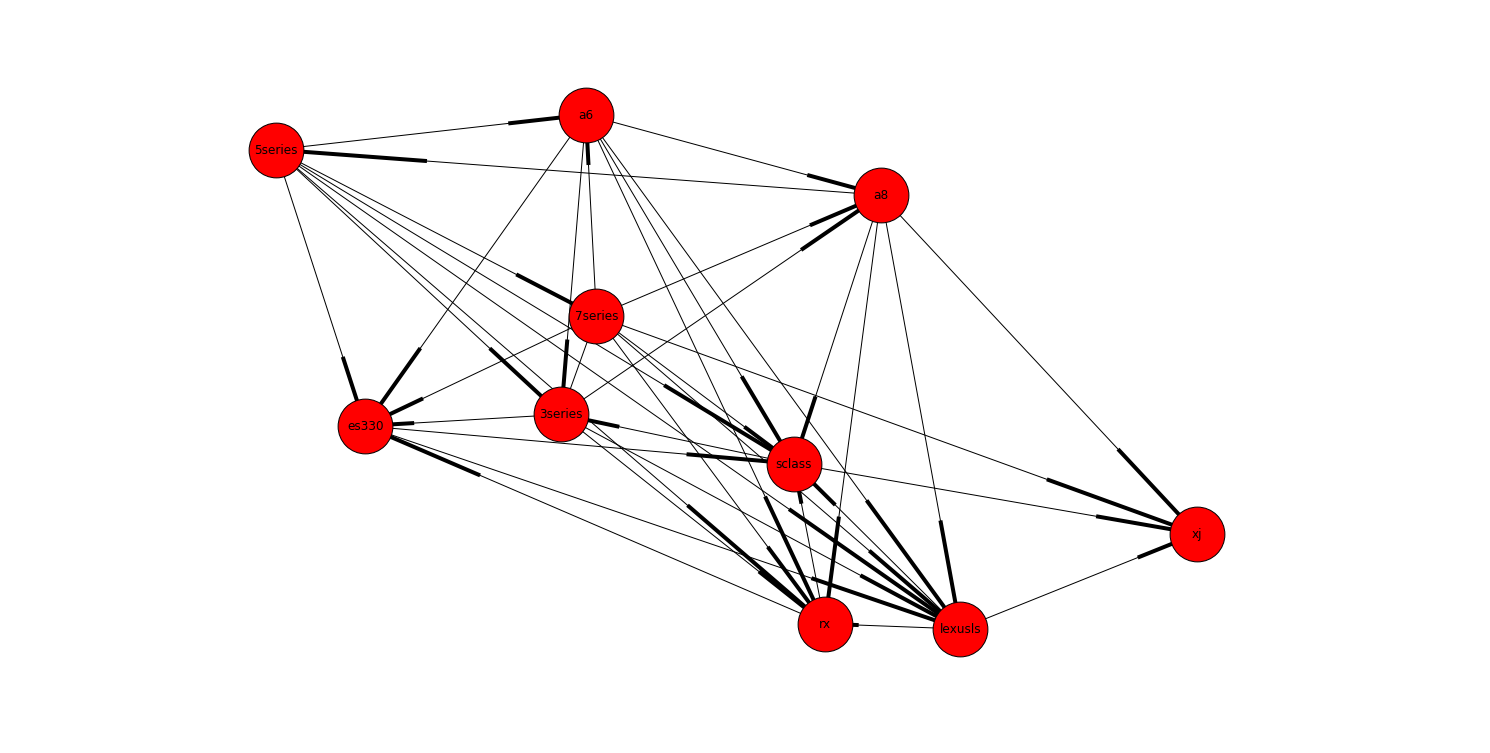

In [162]:
for a,b in senti_diff.iteritems():
    #getting node names
    y = a.split("-")
    if b[0] != 0:
        if (y[0],y[1]) not in graph.edges():
            graph.add_edges_from([(y[0],y[1])])
    elif b[1] != 0:
        if(y[1],y[0]) not in graph.edges():
            graph.add_edges_from([(y[1],y[0])])

plt.figure(figsize=(20,10))
pos=nx.spring_layout(graph)
node_labels = {node:node for node in graph.nodes()}
nx.draw(graph,pos,node_size=3000)
nx.draw_networkx_labels(graph, pos, labels=node_labels)
plt.show()

In [163]:
pr = nx.pagerank(graph)

import operator

pr_sorted = sorted(pr.items(),key = operator.itemgetter(1), reverse = True)
pr_sorted_vals = []
for i in range(len(pr_sorted)):
    pr_sorted_vals.append(pr_sorted[i][1])
    
sales_dict = {'ES' : 135, 'LS' : 30, 'RX' : 120, 'A8':12, 'A6':20, '3series' : 220, '5series' : 60, '7series' :14,'Sclass': 25,'XJ':6.6} 
pr_sorted_vals

[0.18520944038246281,
 0.15891253342805134,
 0.12329114972301032,
 0.11755532003849631,
 0.11225471808929588,
 0.11051543257762249,
 0.06057314121435546,
 0.05320344464089197,
 0.03967990054064061,
 0.03880491936517287]

In [164]:
pr_sorted

[('sclass', 0.18520944038246281),
 ('xj', 0.15891253342805134),
 ('lexusls', 0.12329114972301032),
 ('3series', 0.11755532003849631),
 ('es330', 0.11225471808929588),
 ('rx', 0.11051543257762249),
 ('a8', 0.06057314121435546),
 ('7series', 0.05320344464089197),
 ('a6', 0.03967990054064061),
 ('5series', 0.03880491936517287)]

In [171]:
sales_dict

{'3series': 220,
 '5series': 60,
 '7series': 14,
 'A6': 20,
 'A8': 12,
 'ES': 135,
 'LS': 30,
 'RX': 120,
 'Sclass': 25,
 'XJ': 6.6}

In [172]:
sales_val = [25,6.6,30,220,135,120,12,14,20,60]


print "Unweighted correlation coeff: ",numpy.corrcoef(sales_val,pr_sorted_vals)[0][1]

Unweighted correlation coeff:  0.123223918699


##### weighted graph 

##### for this question, we will consider the sum of senti scores for each car model as the weight. 

In [167]:
def senti_diff_w(s):
    mask = s > 0 
    es_ls = s
    pos = es_ls[mask]
    if len(pos) != 0:
        sum_pos = pos.sum()/len(pos)
    else:
        sum_pos=0
    mask1 = s < 0 
    neg = es_ls[mask1]
    if len(neg)!= 0:
        sum_neg = neg.sum()/len(neg)
        sum_neg = abs(sum_neg)
    else:
        sum_neg = 0
    return (sum_pos,sum_neg)

senti_diff_w = pairs_df.apply(senti_diff_w)


senti_diff_w

3series-5series                (0, 1.66666666667)
3series-7series                (2.66666666667, 0)
3series-a6                               (0, 2.0)
3series-a8                               (3.0, 0)
3series-es330                          (4.0, 2.0)
3series-lexusls                        (2.5, 2.0)
3series-rx                             (1.5, 1.8)
3series-sclass                           (0, 1.0)
3series-xj                                 (0, 0)
5series-7series                        (2.0, 2.0)
5series-a6                             (2.0, 3.0)
5series-a8                               (0, 2.5)
5series-es330                  (1.66666666667, 0)
5series-lexusls              (1.85714285714, 2.0)
5series-rx                               (3.0, 0)
5series-sclass                 (1.33333333333, 0)
5series-xj                                 (0, 0)
7series-a6                               (2.0, 0)
7series-a8                            (2.25, 2.5)
7series-es330                            (2.0, 0)


In [170]:
w_graph = nx.DiGraph()
for a,b in senti_scores_df.iteritems():
    w_graph.add_node(a)

for a,b in senti_diff_w.iteritems():
    #getting node names
    y = a.split("-")
    if b[0] != 0:
        if (y[0],y[1]) not in w_graph.edges():
            w_graph.add_weighted_edges_from([(y[0],y[1],b[0])])
    elif b[1] != 0:
        if(y[1],y[0]) not in w_graph.edges():
            w_graph.add_weighted_edges_from([(y[1],y[0],abs(b[1]))])

pr_w = nx.pagerank(w_graph)

pr_w_sorted = sorted(pr_w.items(),key = operator.itemgetter(1), reverse = True)
pr_w_sorted

sales_dict = {'ES' : 135, 'LS' : 30, 'RX' : 120, 'A8':12, 'A6':20, '3series' : 220, '5series' : 60, '7series' :14,'Sclass': 25,'XJ':6.6} 



sales_val_w = [6.6,25,30,135,120,220,12,14,20,60]

pr_w_sorted_vals = []
for i in pr_w_sorted:
    pr_w_sorted_vals.append(i[1])

print "Weighted correlation coeff: ",numpy.corrcoef(sales_val_w,pr_w_sorted_vals)[0][1]

Weighted correlation coeff:  -0.0783765486519


In [169]:
pr_w_sorted


[('xj', 0.1994706410761109),
 ('sclass', 0.18206471694393622),
 ('lexusls', 0.12080490252363328),
 ('es330', 0.10878597880003155),
 ('rx', 0.1016545396969131),
 ('3series', 0.09279687164636188),
 ('a8', 0.060493526900068144),
 ('7series', 0.052289546745103305),
 ('a6', 0.042309152771357696),
 ('5series', 0.03933012289648402)]

The negative correlation coefficient values between page rank metrics and sales shows us that there are some page rank scores that are more negatively correlated with the page ranks. For example, a lot of people might be interested to search for the costliest and trendy car ( Sclass, A8 ), but not many of them end up buying it. A few percentage of the population that search for it might be able to actually buy it. This could cause the correlation coefficient to go negative.